## XGBoost Model parameter tuning and evalution using Gridsearch
USA World Series Results,
Run on "Diff" data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Data - USA's differential data
df = pd.read_csv('../data/output/new_features_diffdata.csv')
#Import validation data
valdf = pd.read_csv('../data/output/new_features_diffdata_validate.csv')
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,...,-99 : -75,-74 : -25,-24 : -1,0 : 25,26 : 50,51 : 75,76 : 100,101 : 125,126 : 150,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,...,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,...,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,...,-37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df.info()
list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 27 columns):
Opp                            156 non-null object
Tournament                     156 non-null object
Poss_Time_Diff                 156 non-null float64
Score_Diff                     156 non-null float64
Conv_Diff                      156 non-null float64
Tries_Diff                     156 non-null float64
Passes_Diff                    156 non-null float64
Contestable_KO_Win_pct_Diff    156 non-null float64
PenFK_Against_Diff             156 non-null float64
RuckMaul_Diff                  156 non-null float64
Ruck_Win_pct_Diff              156 non-null float64
Cards_diff                     156 non-null float64
Lineout_Win_Pct_Diff           156 non-null float64
Scrum_Win_Pct_Diff             156 non-null float64
-175 : -150                    156 non-null float64
-149 : -125                    156 non-null float64
-124 : -100                    156 non-null float64
-99 : -75    

['Opp',
 'Tournament',
 'Poss_Time_Diff',
 'Score_Diff',
 'Conv_Diff',
 'Tries_Diff',
 'Passes_Diff',
 'Contestable_KO_Win_pct_Diff',
 'PenFK_Against_Diff',
 'RuckMaul_Diff',
 'Ruck_Win_pct_Diff',
 'Cards_diff',
 'Lineout_Win_Pct_Diff',
 'Scrum_Win_Pct_Diff',
 '-175 : -150',
 '-149 : -125',
 '-124 : -100',
 '-99 : -75',
 '-74 : -25',
 '-24 : -1',
 '0 : 25',
 '26 : 50',
 '51 : 75',
 '76 : 100',
 '101 : 125',
 '126 : 150',
 'Result']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Create a list of features to drop that are unneccessary or will bias the prediction
droplist = ['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff','-175 : -150', '-149 : -125','-124 : -100', '-99 : -75', '-74 : -25','-24 : -1','0 : 25','26 : 50','51 : 75','76 : 100','101 : 125','126 : 150']

rf_data = df.drop((droplist), axis=1)
#Drop rows with Result == "T" (Ties). This label messes up classification models
rf_data.drop(rf_data[rf_data.Result == 2].index, inplace=True)

In [6]:
rf_data.head()
#Check to insure 'Result' only contains 2 values (W, L)
rf_data['Result'].describe()
#rf_data.describe()

count    151.000000
mean       0.562914
std        0.497677
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Result, dtype: float64

### Set up train/test split

In [7]:
#Pull out the variable we're trying to predict: 'Result'
X = rf_data.drop('Result',axis=1)
y = rf_data['Result']
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

### Scale Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Run train/test split

In [9]:
#Split into train/test/validate sets
#OR, keep as is and use new data for validate
#156 rows in original dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Validation set
Imported last two series stops (London & Paris - 12 matches total) to use as a validation set.

Need to incorporate into larger data set later.

In [10]:
#Create a list of features to drop that are unneccessary or will bias the prediction
droplist = ['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff','-175 : -150', '-149 : -125','-124 : -100', '-99 : -75', '-74 : -25','-24 : -1','0 : 25','26 : 50','51 : 75','76 : 100','101 : 125','126 : 150']

rf_val_data = valdf.drop((droplist), axis=1)

#Drop rows with Result == "T" (Ties). This label messes up classification models
rf_val_data.drop(rf_val_data[rf_val_data.Result == 2].index, inplace=True)

In [11]:
#Pull out the variable we're trying to predict: 'Result'
X_val = rf_val_data.drop('Result',axis=1)
y_val = rf_val_data['Result']

### Scale the Data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Train an XGBoost Classifier Model
Info from https://jessesw.com/XG-Boost/

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Set up hyperparameter tuning/Grid Search¶

In [14]:
#Set parameters for first grid search. Start tuning on the maximum depth of the trees first, 
#along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version 
#of gradient boosted trees. We set the objective to ‘binary:logistic’ since this is a binary 
#classification problem
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':101, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'random_state':101}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy

In [15]:
optimized_GBM

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.8),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
# Run the grid search
optimized_GBM.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.8),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
# Check grid scores (see deprecation warning - change from grid_scores_ to cv_results_ attribute
optimized_GBM.cv_results_
# score decreased from RF to 62% from 71%:
# mean: 0.62857, std: 0.13399, params: {'max_depth': 3, 'min_child_weight': 5}

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/admin/anaconda3/lib/pyth

{'mean_fit_time': array([0.0169301 , 0.0161499 , 0.01471996, 0.01963601, 0.0180223 ,
        0.01899333, 0.02069335, 0.01354899, 0.01116328]),
 'std_fit_time': array([0.00071912, 0.00209905, 0.0020378 , 0.0009389 , 0.00391475,
        0.00324873, 0.00205747, 0.00141454, 0.0011915 ]),
 'mean_score_time': array([0.00177789, 0.00090137, 0.00093274, 0.00091143, 0.00147295,
        0.00148501, 0.00089359, 0.00087299, 0.00078082]),
 'std_score_time': array([4.86399729e-04, 4.58110241e-05, 1.01304433e-04, 2.67842450e-05,
        1.01499061e-03, 6.88196484e-04, 1.06996563e-05, 2.44931137e-04,
        6.70320100e-05]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
         

### Select best parameters

use these parameters (resulting in mean: 0.60952):

mean: 0.60952, std: 0.11613, params: {'max_depth': 3, 'min_child_weight': 1}

** params: {'max_depth': 3, 'min_child_weight': 1} **

Adjust subsampling along with lowering the learning rate to see if that helps

In [19]:
# Best score and parameter set
print("Best score: %s" % (optimized_GBM.best_score_))
print("Best parameter set: %s" % (optimized_GBM.best_params_))

Best score: 0.6095238095238096
Best parameter set: {'max_depth': 3, 'min_child_weight': 1}


In [20]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9], 'n_estimators': [100, 500, 1000]}
ind_params = {'seed':101, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1, 'random_state': 101}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
# Run the grid search again
optimized_GBM.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9], 'n_estimators': [100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
# check the Grid Scores again - increased to 0.67619 by tweaking parameters
# Increased CV folds to cv=11, {'max_depth': 5, 'min_child_weight': 1}
# mean: 0.68571, std: 0.13895, params: {'learning_rate': 0.1, 'subsample': 0.8}
# Best score and parameter set
print("Best score: %s" % (optimized_GBM.best_score_))
print("Best parameter set: %s" % (optimized_GBM.best_params_))
#optimized_GBM.cv_results_


Best score: 0.6190476190476191
Best parameter set: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.9}


In [22]:
optimized_GBM

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9], 'n_estimators': [100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Final parameters:
No increase in mean.

Improved to 62% (mean: mean: 0.62857, std: 0.09520):

**params: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.9}**

<code>
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       params={'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.9},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
</code>
ind_params = {'seed':101, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3, 'random_state': 101}

## Create a DMatrix
To increase the performance of XGBoost's speed through many iterations of the training set, and since we are using only XGBoost's API and not sklearn's anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:

In [23]:
# Create our DMatrix to make XGBoost more efficient
xgdmat = xgb.DMatrix(X_train, y_train) 

## Early Stopping CV

In [24]:
our_params = {'n_estimators': 100, 'learning_rate': 0.01, 'subsample': 0.9, 'max_depth': 3, 'min_child_weight': 1, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [25]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
25,0.152381,0.023084,0.352381,0.038095
26,0.159524,0.017817,0.361904,0.038095
27,0.157143,0.020482,0.352381,0.038095
28,0.150000,0.024514,0.342857,0.035635
29,0.152381,0.020482,0.342857,0.035635


### Results
Test error mean of 0.361904, or 64% accuracy

Now that we have our best settings, create this as an XGBoost object model that we can reference later.

In [26]:
#our_params = {'eta': 0.1, 'seed':101, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 8)

In [27]:
# Plot feature importances
%matplotlib inline
#sns.set(font_scale = 1.5)

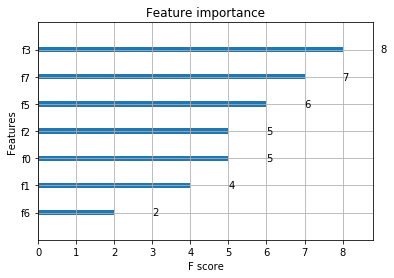

In [65]:
xgb.plot_importance(final_gb, importance_type='weight')

In [ ]:
#print(xgb.feature_importances_)

In [28]:
importances = final_gb.get_fscore()
importances

{'f5': 6, 'f6': 2, 'f3': 8, 'f0': 5, 'f7': 7, 'f2': 5, 'f1': 4}

In [29]:
testdmat = xgb.DMatrix(X_test, y_test)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
#y_pred

In [31]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
#y_pred

In [32]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.5, 0.5)

**Accuracy is 54%**

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Output confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

#import libraries to ignore UndefinedMetricWarning
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

#get the model's accuracy score
accuracy_score(y_test, y_pred)
print("\n")
print("Classification Report")
print(classification_report(y_test, y_pred))

#print accuracy score
print("\n")
print("Accuracy Score")
print(accuracy_score(y_pred, y_test))

Confusion Matrix
[[ 8 15]
 [ 8 15]]


Classification Report
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        23
           1       0.50      0.65      0.57        23

   micro avg       0.50      0.50      0.50        46
   macro avg       0.50      0.50      0.49        46
weighted avg       0.50      0.50      0.49        46



Accuracy Score
0.5


### Predict Values using Validation Set

In [34]:
valdmat = xgb.DMatrix(X_val, y_val)

In [35]:
y_val_pred = final_gb.predict(valdmat) # Predict using our testdmat
#y_val_pred

In [36]:
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0
y_val_pred

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [37]:
accuracy_score(y_val_pred, y_val), 1-accuracy_score(y_val_pred, y_val)

(0.6, 0.4)

**Accuracy on validation data is 60%**

In [38]:
#Output confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_val,y_val_pred))

#import libraries to ignore UndefinedMetricWarning
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

#get the model's accuracy score
accuracy_score(y_val, y_val_pred)
print("\n")
print("Classification Report")
print(classification_report(y_val, y_val_pred))

#print accuracy score
print("\n")
print("Accuracy Score")
print(accuracy_score(y_val_pred, y_val))

Confusion Matrix
[[1 3]
 [1 5]]


Classification Report
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.62      0.83      0.71         6

   micro avg       0.60      0.60      0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10



Accuracy Score
0.6


In [41]:
from sklearn.metrics import f1_score
f1_score(y_val_pred, y_val, average='binary')

0.7142857142857143